In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dataset import PolarisPublicationData

In [2]:
data = PolarisPublicationData()

In [3]:
density_data, intensity_data = data.load_data(figure='S7')

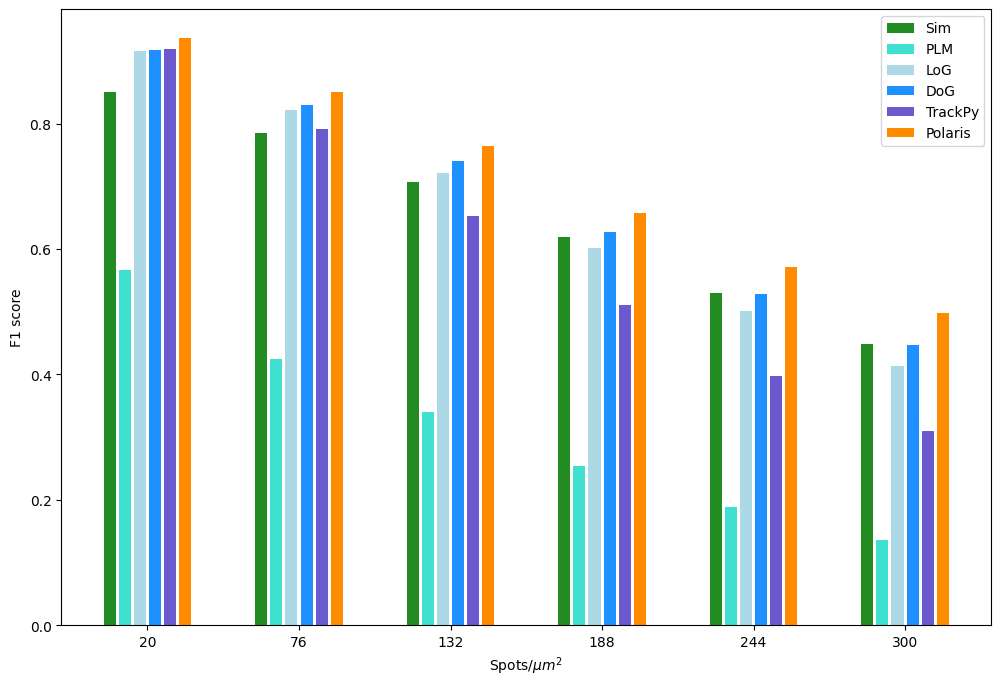

In [4]:
color_map = ['forestgreen','turquoise','lightblue','dodgerblue','slateblue','darkorange']

plt.figure(figsize=(12,8))
for i in range(len(density_data)):
    plt.bar(np.arange(6)*10+i, density_data.iloc[i][1:], width=0.8, label=density_data.iloc[i][0], color=color_map[i])
plt.xticks(ticks=np.arange(6)*10+2.5, labels=list(density_data.columns[1:]))
plt.xlabel('Spots/$\mu m^2$')
plt.ylabel('F1 score')
plt.legend()
plt.show()

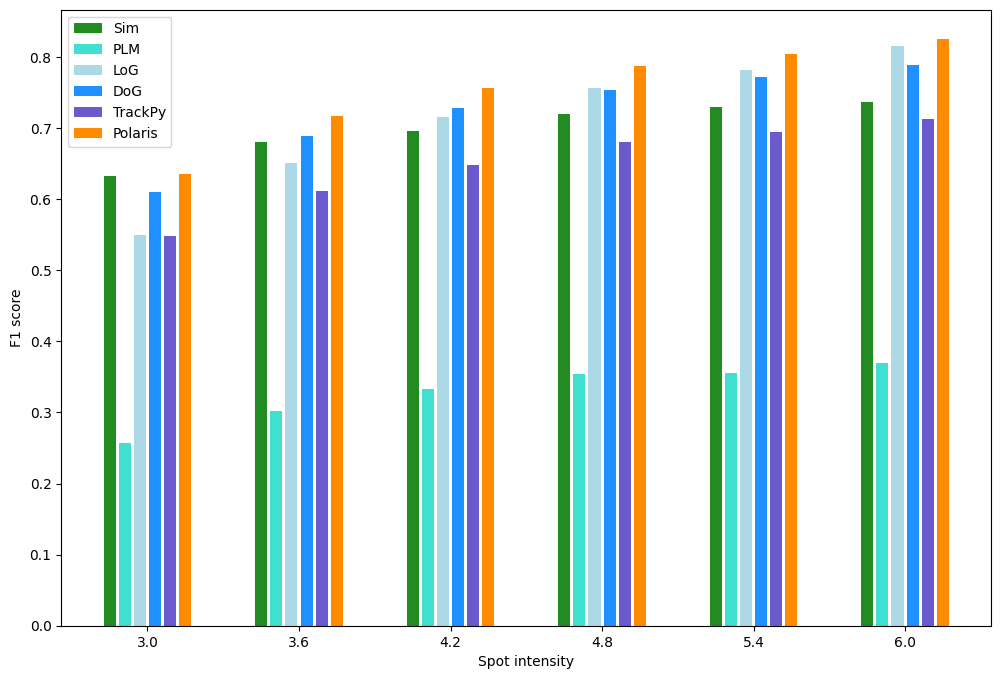

In [5]:
plt.figure(figsize=(12,8))
for i in range(len(intensity_data)):
    plt.bar(np.arange(6)*10+i, intensity_data.iloc[i][1:], width=0.8, label=intensity_data.iloc[i][0], color=color_map[i])
plt.xticks(ticks=np.arange(6)*10+2.5, labels=list(intensity_data.columns[1:]))
plt.xlabel('Spot intensity')
plt.ylabel('F1 score')
plt.legend()
plt.show()